# Compare processed datasets

In [1]:
from IPython.display import display
from os import path
from os.path import join

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
import plotly.express as px

from qsprpred.models import QSPRModel
from qsprpred.data import QSPRDataset

# ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# set color palette
a2arcolors = ["#FFCEAD", "#AAC5AC", "#447464", "#575463", "#9E949D", "#C46D5E", "#F4AC32",  "#7EB77F", "#20A39E"]
a2arcolors_green_to_red = ["#447464", "#849872", "#ceb98d", "#f1b696", "#db9178", "#c46d5e"]
a2arcolors_duo = ["#AAC5AC", "#FFCEAD"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=a2arcolors)
sns.set_palette(a2arcolors)

display(sns.color_palette(a2arcolors))
display(sns.color_palette(a2arcolors_green_to_red))
display(sns.color_palette(a2arcolors_duo))

mpl.rcParams.update({'font.size': 15})
COLOR = '#5A5766'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


[(1.0, 0.807843137254902, 0.6784313725490196),
 (0.6666666666666666, 0.7725490196078432, 0.6745098039215687),
 (0.26666666666666666, 0.4549019607843137, 0.39215686274509803),
 (0.3411764705882353, 0.32941176470588235, 0.38823529411764707),
 (0.6196078431372549, 0.5803921568627451, 0.615686274509804),
 (0.7686274509803922, 0.42745098039215684, 0.3686274509803922),
 (0.9568627450980393, 0.6745098039215687, 0.19607843137254902),
 (0.49411764705882355, 0.7176470588235294, 0.4980392156862745),
 (0.12549019607843137, 0.6392156862745098, 0.6196078431372549)]

[(0.26666666666666666, 0.4549019607843137, 0.39215686274509803),
 (0.5176470588235295, 0.596078431372549, 0.4470588235294118),
 (0.807843137254902, 0.7254901960784313, 0.5529411764705883),
 (0.9450980392156862, 0.7137254901960784, 0.5882352941176471),
 (0.8588235294117647, 0.5686274509803921, 0.47058823529411764),
 (0.7686274509803922, 0.42745098039215684, 0.3686274509803922)]

[(0.6666666666666666, 0.7725490196078432, 0.6745098039215687),
 (1.0, 0.807843137254902, 0.6784313725490196)]

In [2]:
# set paths
DATA_PATH = '/zfsdata/data/helle/01_MainProjects/01_A2AR_in_cancer/Data/'
RAW_DATA_PATH = f'{DATA_PATH}/01_raw'
PROCESSED_DATA_PATH = f'{DATA_PATH}/02_processed'
FIGURES_PATH = f'{DATA_PATH}/03_figures'

A2AR_DATA_FOLDER_NAME = 'AdenosineReceptorsDataset'
A2AR_DATASET_PATH = path.join(PROCESSED_DATA_PATH, A2AR_DATA_FOLDER_NAME)
A2AR_DATASET_FIGURES_PATH = path.join(FIGURES_PATH, A2AR_DATA_FOLDER_NAME)

A2AR_QSAR_FOLDER_NAME = 'AdenosineReceptorsQSAR'
A2AR_QSAR_PATH = path.join(PROCESSED_DATA_PATH, A2AR_QSAR_FOLDER_NAME)
A2AR_QSAR_DATA_PATH = path.join(A2AR_QSAR_PATH, 'data')
A2AR_QSAR_MODELS_PATH = path.join(A2AR_QSAR_PATH, 'models')
A2AR_QSAR_FIGURES_PATH = path.join(FIGURES_PATH, A2AR_QSAR_FOLDER_NAME)

PK_DATA_FOLDER_NAME = 'PKDataset'
PK_DATASET_PATH = path.join(PROCESSED_DATA_PATH, PK_DATA_FOLDER_NAME)
PK_DATASET_FIGURES_PATH = path.join(FIGURES_PATH, PK_DATA_FOLDER_NAME)

PK_QSAR_FOLDER_NAME = 'PKQSPR'
PK_QSAR_PATH = path.join(PROCESSED_DATA_PATH, PK_QSAR_FOLDER_NAME)
PK_QSAR_DATA_PATH = path.join(PK_QSAR_PATH, 'data')
PK_QSAR_MODELS_PATH = path.join(PK_QSAR_PATH, 'models')
PK_QSAR_FIGURES_PATH = path.join(FIGURES_PATH, PK_QSAR_FOLDER_NAME)

COMPARE_DATA_FIGURES_PATH = path.join(FIGURES_PATH, 'CompareDatasets')

In [3]:
# load in a2ar and FU, CL and VDSS datasets
MODEL_CL = QSPRModel.fromFile(join(PK_QSAR_MODELS_PATH, 'SVR_CL_MorganFP_RDkit_B_80_HC_0.95/SVR_CL_MorganFP_RDkit_B_80_HC_0.95_meta.json'))
DATA_CL = QSPRDataset.fromFile(join(PK_QSAR_DATA_PATH, 'CL_MorganFP_RDkit_B_80_HC_0.95/CL_MorganFP_RDkit_B_80_HC_0.95_meta.json'))
MODEL_FU = QSPRModel.fromFile(join(PK_QSAR_MODELS_PATH, 'SVR_FU_MorganFP_RDkit_B_80_HC_0.9/SVR_FU_MorganFP_RDkit_B_80_HC_0.9_meta.json'))
DATA_FU = QSPRDataset.fromFile(join(PK_QSAR_DATA_PATH, 'FU_MorganFP_RDkit_B_80_HC_0.9/FU_MorganFP_RDkit_B_80_HC_0.9_meta.json'))
MODEL_VDSS = QSPRModel.fromFile(join(PK_QSAR_MODELS_PATH, 'SVR_VDSS_MorganFP_RDkit_B_80_HC_0.99/SVR_VDSS_MorganFP_RDkit_B_80_HC_0.99_meta.json'))
DATA_VDSS = QSPRDataset.fromFile(join(PK_QSAR_DATA_PATH, 'VDSS_MorganFP_RDkit_B_80_HC_0.99/VDSS_MorganFP_RDkit_B_80_HC_0.99_meta.json'))
MODEL_A2AR = QSPRModel.fromFile(join(A2AR_QSAR_MODELS_PATH, 'SVR_A2AR_MorganFP_RDkit_B_80_HC_0.99/SVR_A2AR_MorganFP_RDkit_B_80_HC_0.99_meta.json'))
DATA_A2AR = QSPRDataset.fromFile(join(A2AR_QSAR_DATA_PATH, 'A2AR_MorganFP_RDkit_B_80_HC_0.99/A2AR_MorganFP_RDkit_B_80_HC_0.99_meta.json'))


In [4]:
from mlchemad.applicability_domains import (
    ApplicabilityDomain, TopKatApplicabilityDomain, KNNApplicabilityDomain,
    BoundingBoxApplicabilityDomain, PCABoundingBoxApplicabilityDomain,
    LeverageApplicabilityDomain, HotellingT2ApplicabilityDomain,
    KernelDensityApplicabilityDomain, IsolationForestApplicabilityDomain,
    CentroidDistanceApplicabilityDomain, StandardizationApproachApplicabilityDomain,
    LocalOutlierFactorApplicabilityDomain)

def create_combined_dataset_with_ad(primary_model: QSPRModel,
                                    primary_dataset: QSPRDataset,
                                    secondary_dataset: QSPRDataset,
                                    primary_dataset_name: str,
                                    secondary_dataset_name: str,
                                    ad_dict: dict[str, ApplicabilityDomain],
                                    ad_raw: dict[str, bool]):
    # fit applicability domain to primary dataset
    for ad_name, ad in ad_dict.items():
        ad.fit(primary_dataset.getFeatures(concat=True, ordered=True, raw=ad_raw[ad_name], refit_standardizer=True))
    
    # append smiles of secondary dataset to primary dataset
    combined_smiles = pd.concat([primary_dataset.getDF()['SMILES'], secondary_dataset.getDF()['SMILES']])
    
    # create prediction dataset from combined smiles with primary dataset
    combined_dataset, failed_mask = primary_model.createPredictionDatasetFromMols(combined_smiles, fill_value=0)
    
    # add property dataset with values primary_dataset name or secondary_dataset name to combined_dataset
    combined_dataset.addProperty(
        'Dataset',
        list(
            pd.concat(
                [
                    pd.Series([primary_dataset_name]*len(primary_dataset.getDF())),
                    pd.Series([secondary_dataset_name]*len(secondary_dataset.getDF()))
                ]
            )
        )
    )
    
    # add target property values to combined_dataset
    combined_dataset.addProperty(
        primary_dataset.targetPropertyNames[0],
        list(
            pd.concat(
                [
                    primary_dataset.getDF()[primary_dataset.targetPropertyNames[0]],
                    pd.Series([None]*len(secondary_dataset.getDF()))
                ]
            )
        )
    )
    
    # add applicability domain to combined_dataset
    for ad_name, ad in ad_dict.items():
        combined_dataset.addProperty(
            ad_name,
            ad.contains(combined_dataset.getFeatures(concat=True, ordered=True, raw=ad_raw[ad_name], refit_standardizer=False))
        )
        
    # print for each dataset the number of compounds within the applicability domain
    print(f"Applicability domain fit to {primary_dataset_name}")
    print(f"Total number of compounds in {primary_dataset_name}: {len(primary_dataset)}")
    for ad_name, ad in ad_dict.items():
        print(f"Number of compounds in {primary_dataset_name} within applicability domain {ad_name}: {combined_dataset.df[combined_dataset.df.Dataset == primary_dataset_name][ad_name].sum()}")
    print(f"Total number of compounds in {secondary_dataset_name}: {len(secondary_dataset)}")
    for ad_name, ad in ad_dict.items():
        print(f"Number of compounds in {secondary_dataset_name} within applicability domain {ad_name}: {combined_dataset.df[combined_dataset.df.Dataset == secondary_dataset_name][ad_name].sum()}")
    
    return combined_dataset

topkat = TopKatApplicabilityDomain()
knndomain_eu = KNNApplicabilityDomain(dist='euclidean', k=2, alpha=0.99)
boundingbox = BoundingBoxApplicabilityDomain(percentiles=None)
pcaboundingbox = PCABoundingBoxApplicabilityDomain(explained_var=0.95)
pcaboundingbox_1 = PCABoundingBoxApplicabilityDomain(explained_var=1)
leveraging = LeverageApplicabilityDomain()
hotelling = HotellingT2ApplicabilityDomain()
kerneldensity = KernelDensityApplicabilityDomain()
isolationforest = IsolationForestApplicabilityDomain()
centroidDistance = CentroidDistanceApplicabilityDomain()
standardizationapproach =  StandardizationApproachApplicabilityDomain()
localoutlierfactor = LocalOutlierFactorApplicabilityDomain(n_neighbors=20)

ad_to_test = {'TopKat': topkat, 'KNN_Euclidean': knndomain_eu,
              'BoundingBox': boundingbox, 'PCABoundingBox': pcaboundingbox,
              'PCABoundingBox1': pcaboundingbox_1,
              'Leveraging': leveraging, 'HotellingT2': hotelling,
              'KernelDensity': kerneldensity, 'IsolationForest': isolationforest,
              'CentroidDistance': centroidDistance,
              'StandardizationApproach': standardizationapproach,
              'LocalOutlierFactor': localoutlierfactor}

ad_needs_raw = {'TopKat': False, 'KNN_Euclidean': False, 'BoundingBox': True,
                'PCABoundingBox': True, 'PCABoundingBox1': True, 'Leveraging': True, 'HotellingT2': False,
                'KernelDensity': False, 'IsolationForest': False,
                'CentroidDistance': True, 'StandardizationApproach': True,
                'LocalOutlierFactor': True}

combined_dataset_A2AR_CL = create_combined_dataset_with_ad(
    MODEL_A2AR, DATA_A2AR, DATA_CL, "A2AR", "CL", ad_to_test, ad_needs_raw
)
combined_dataset_A2AR_FU = create_combined_dataset_with_ad(
    MODEL_A2AR, DATA_A2AR, DATA_FU, "A2AR", "FU", ad_to_test, ad_needs_raw
)
combined_dataset_A2AR_VDSS = create_combined_dataset_with_ad(
    MODEL_A2AR, DATA_A2AR, DATA_VDSS, "A2AR", "VDSS", ad_to_test, ad_needs_raw
)
combined_dataset_CL_A2AR = create_combined_dataset_with_ad(
    MODEL_CL, DATA_CL, DATA_A2AR, "CL", "A2AR", ad_to_test, ad_needs_raw
)
combined_dataset_FU_A2AR = create_combined_dataset_with_ad(
    MODEL_FU, DATA_FU, DATA_A2AR, "FU", "A2AR", ad_to_test, ad_needs_raw
)
combined_dataset_VDSS_A2AR = create_combined_dataset_with_ad(
    MODEL_VDSS, DATA_VDSS, DATA_A2AR, "VDSS", "A2AR", ad_to_test, ad_needs_raw
)


Applicability domain fit to A2AR
Total number of compounds in A2AR: 3334
Number of compounds in A2AR within applicability domain TopKat: 3291
Number of compounds in A2AR within applicability domain KNN_Euclidean: 3312
Number of compounds in A2AR within applicability domain BoundingBox: 3334
Number of compounds in A2AR within applicability domain PCABoundingBox: 3334
Number of compounds in A2AR within applicability domain PCABoundingBox1: 3328
Number of compounds in A2AR within applicability domain Leveraging: 3315
Number of compounds in A2AR within applicability domain HotellingT2: 2847
Number of compounds in A2AR within applicability domain KernelDensity: 3334
Number of compounds in A2AR within applicability domain IsolationForest: 3322
Number of compounds in A2AR within applicability domain CentroidDistance: 3218
Number of compounds in A2AR within applicability domain StandardizationApproach: 0
Number of compounds in A2AR within applicability domain LocalOutlierFactor: 3334
Total num

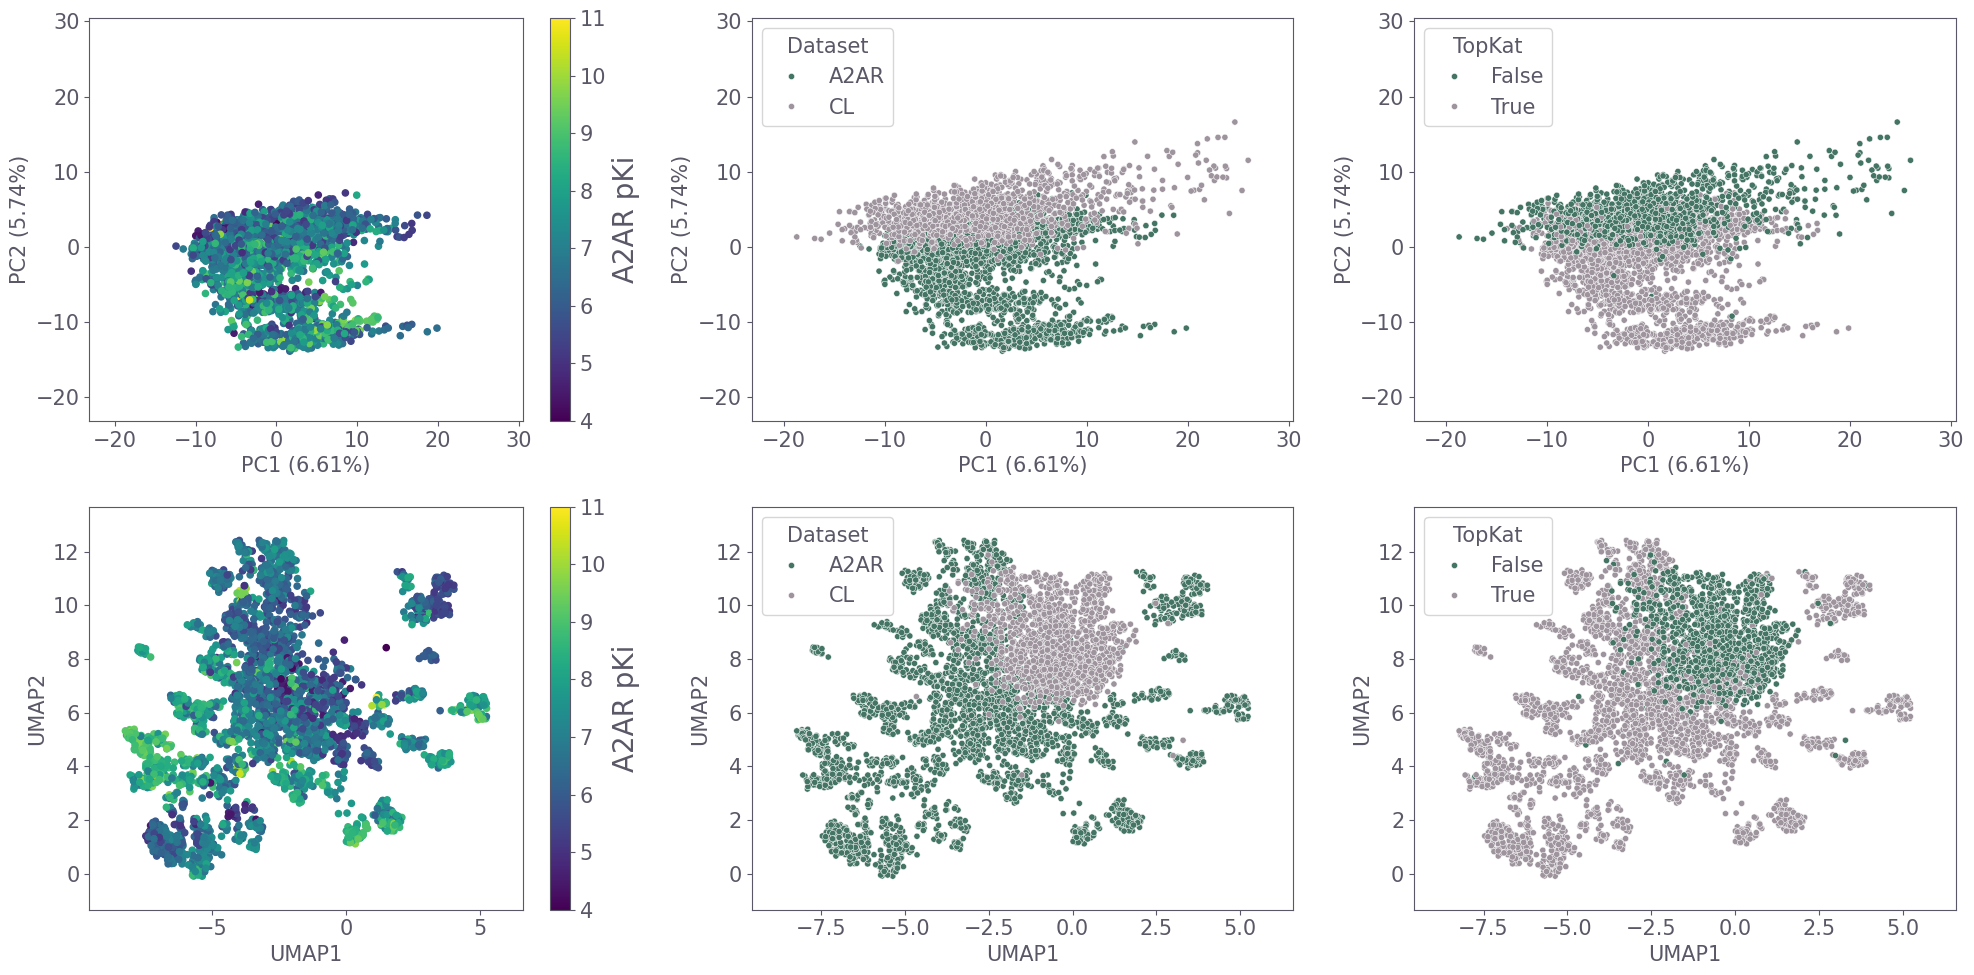

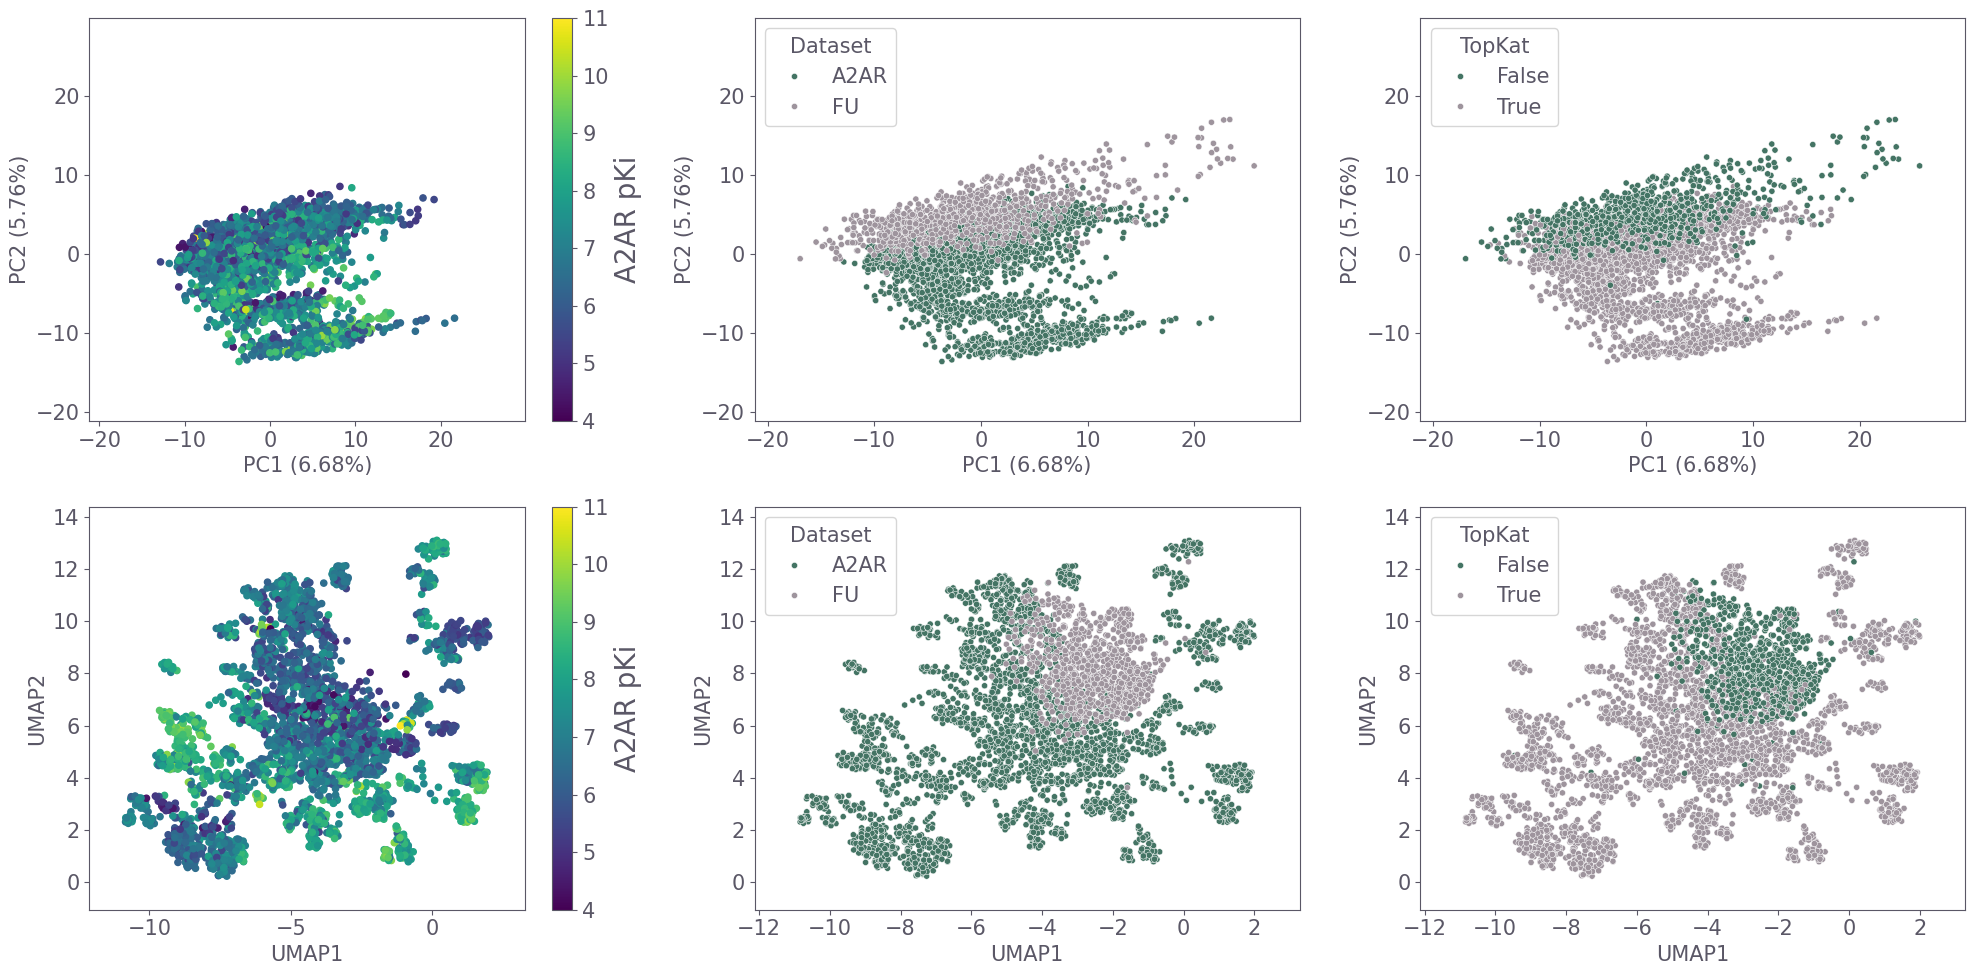

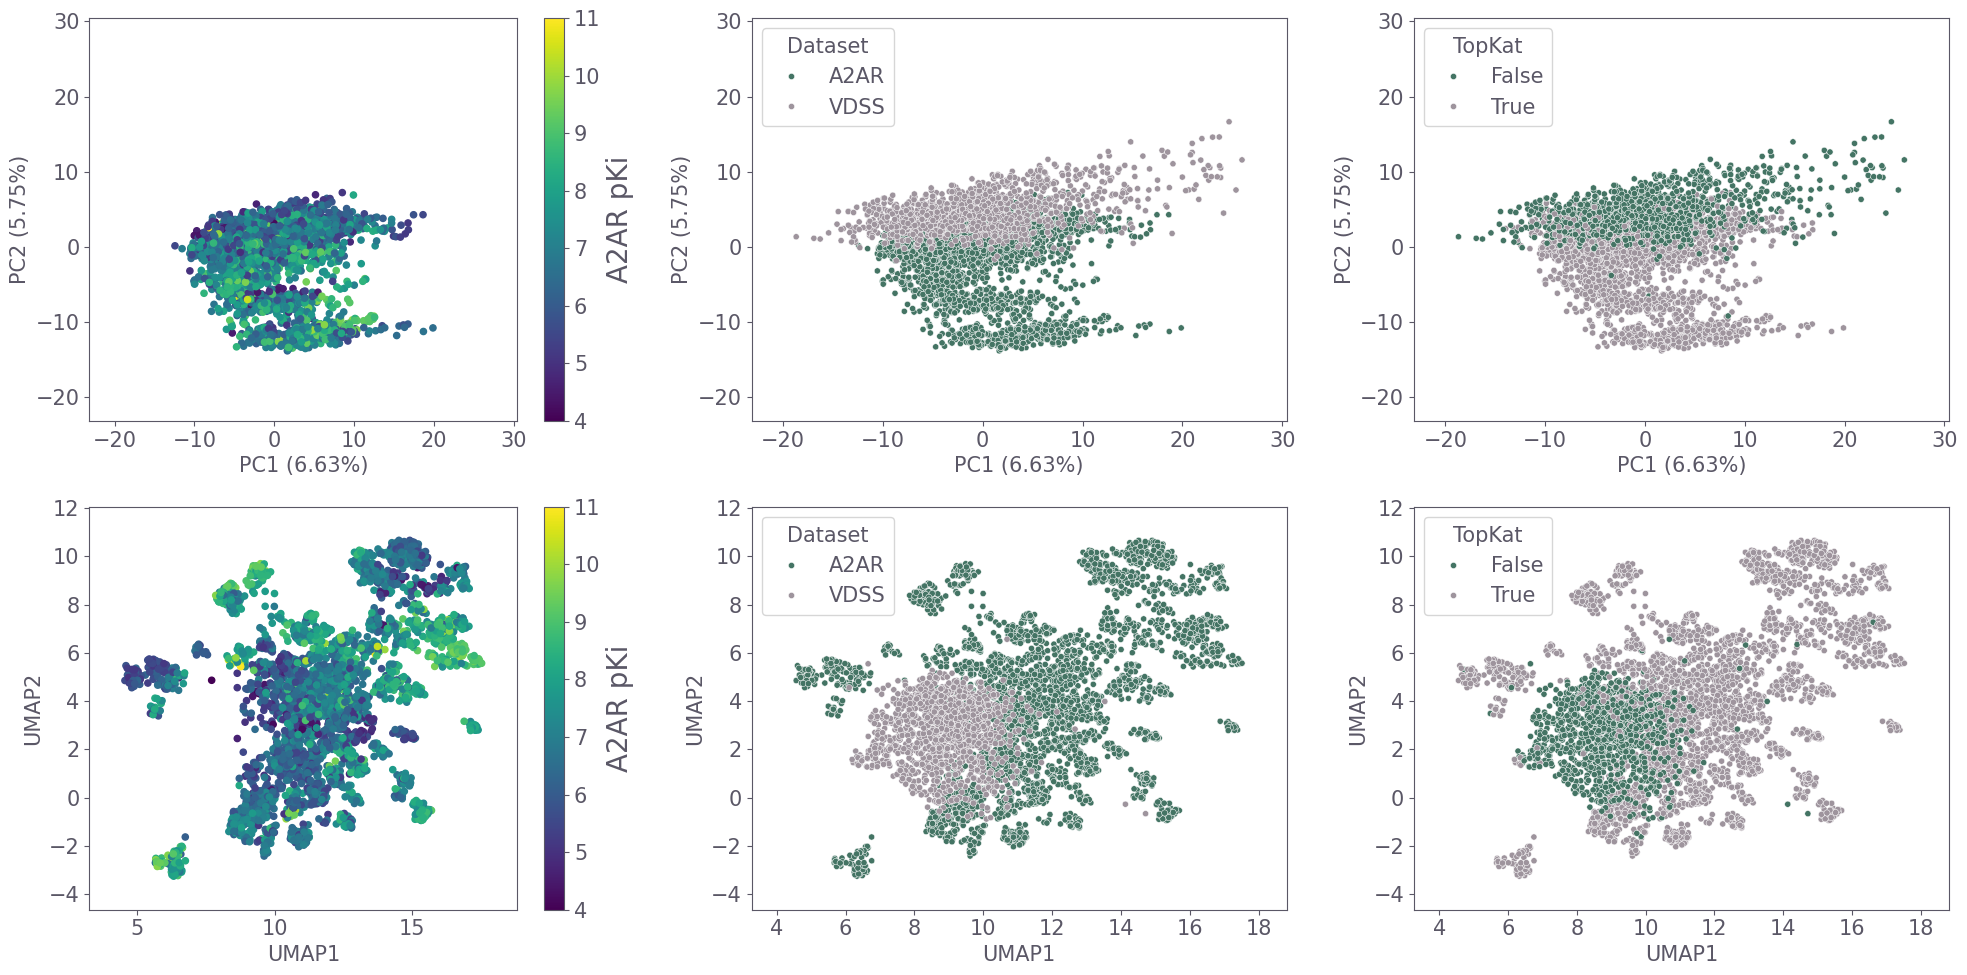

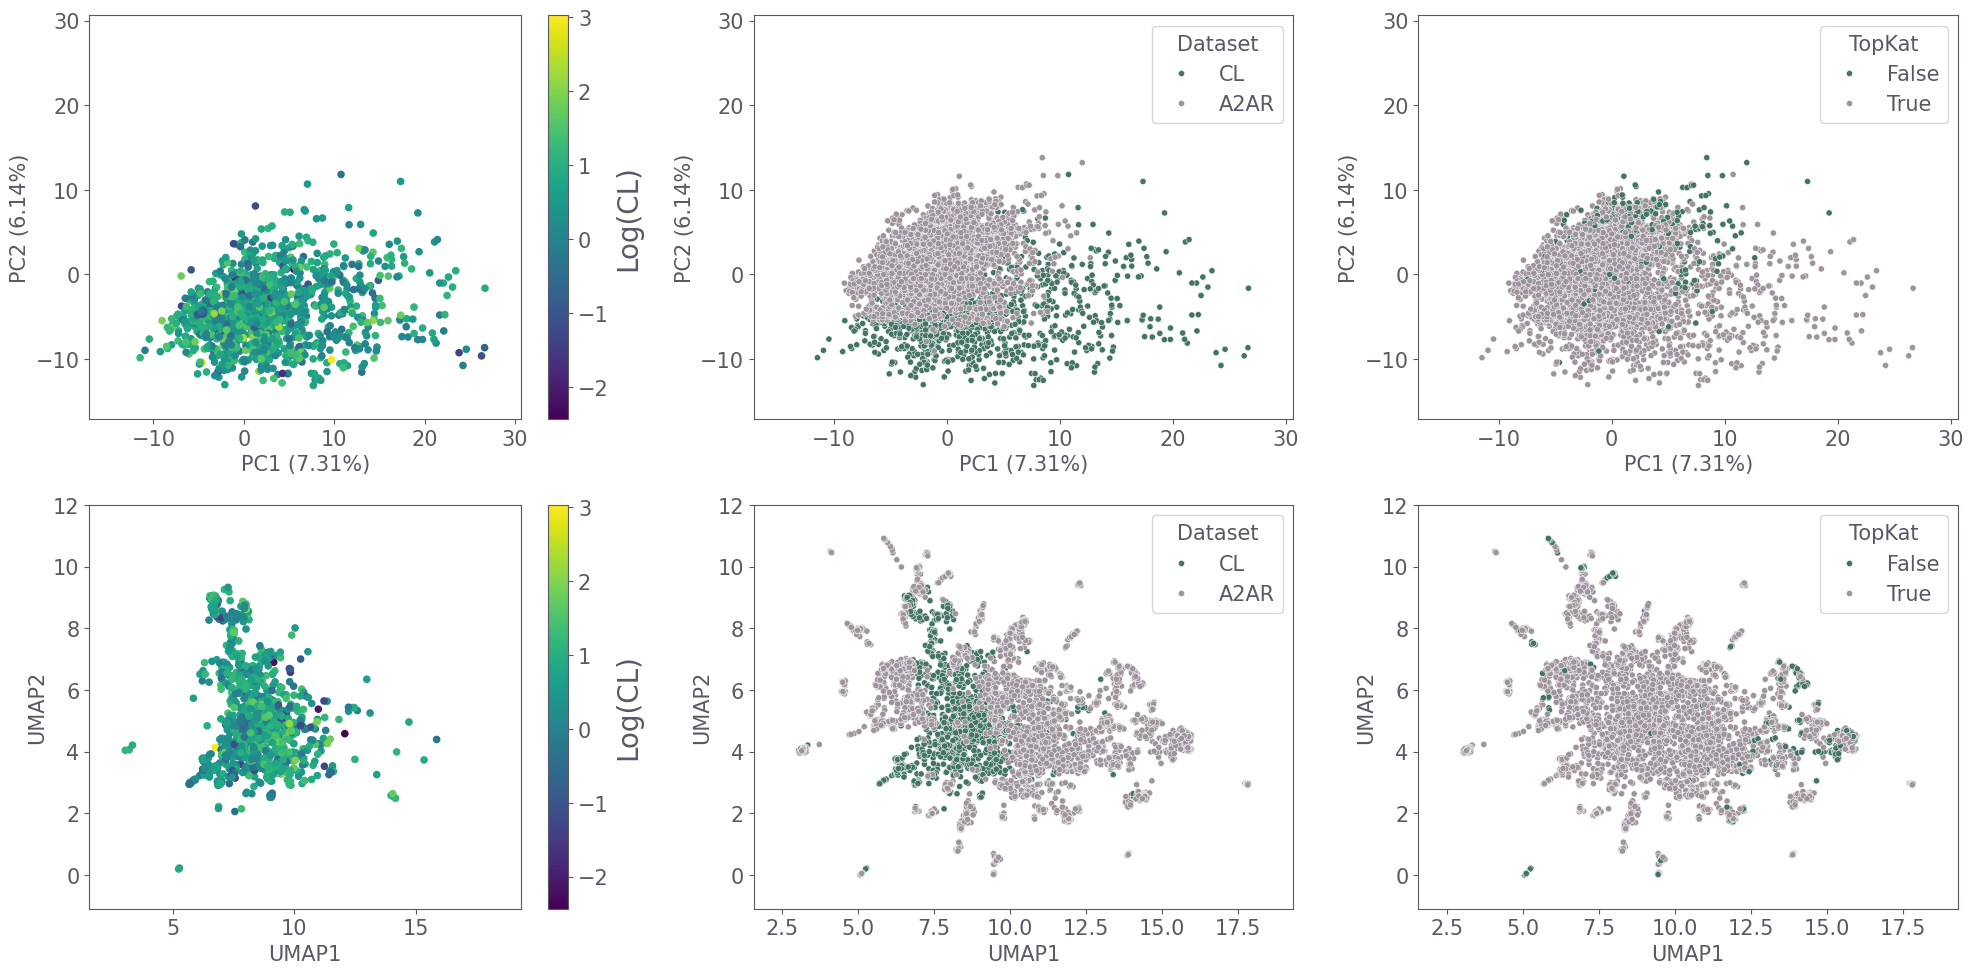

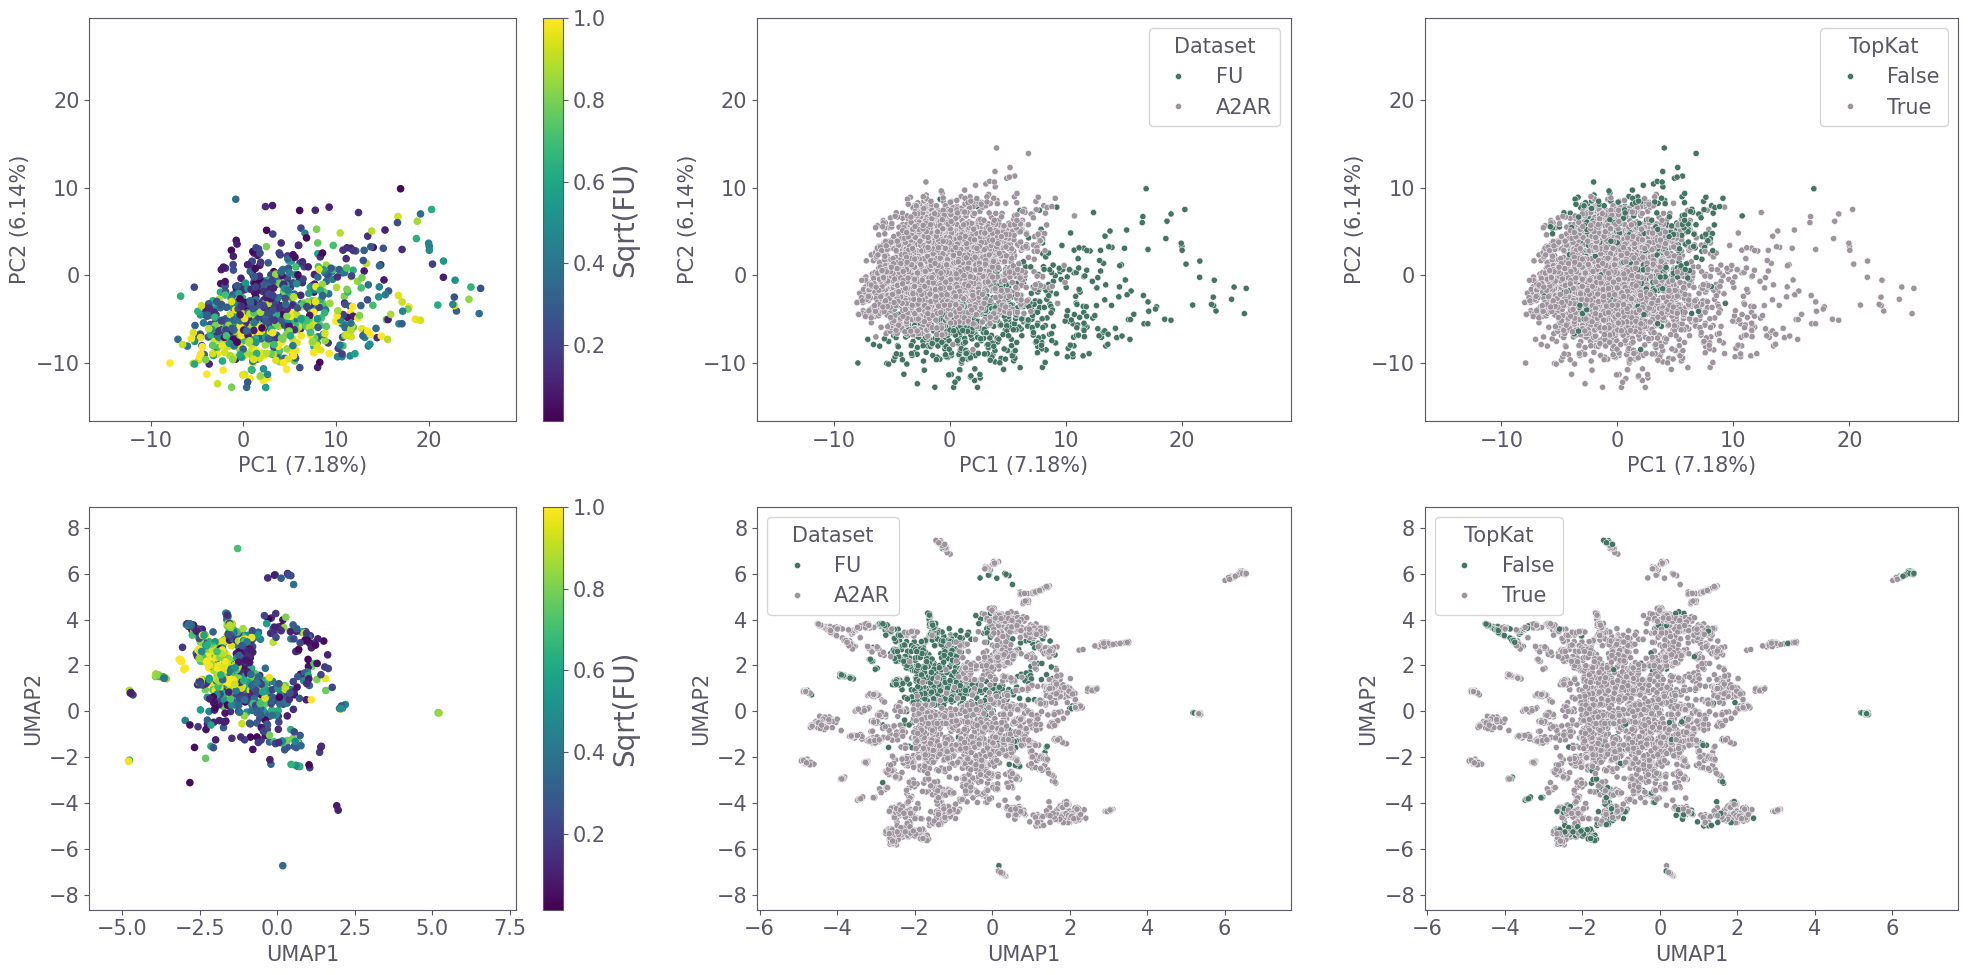

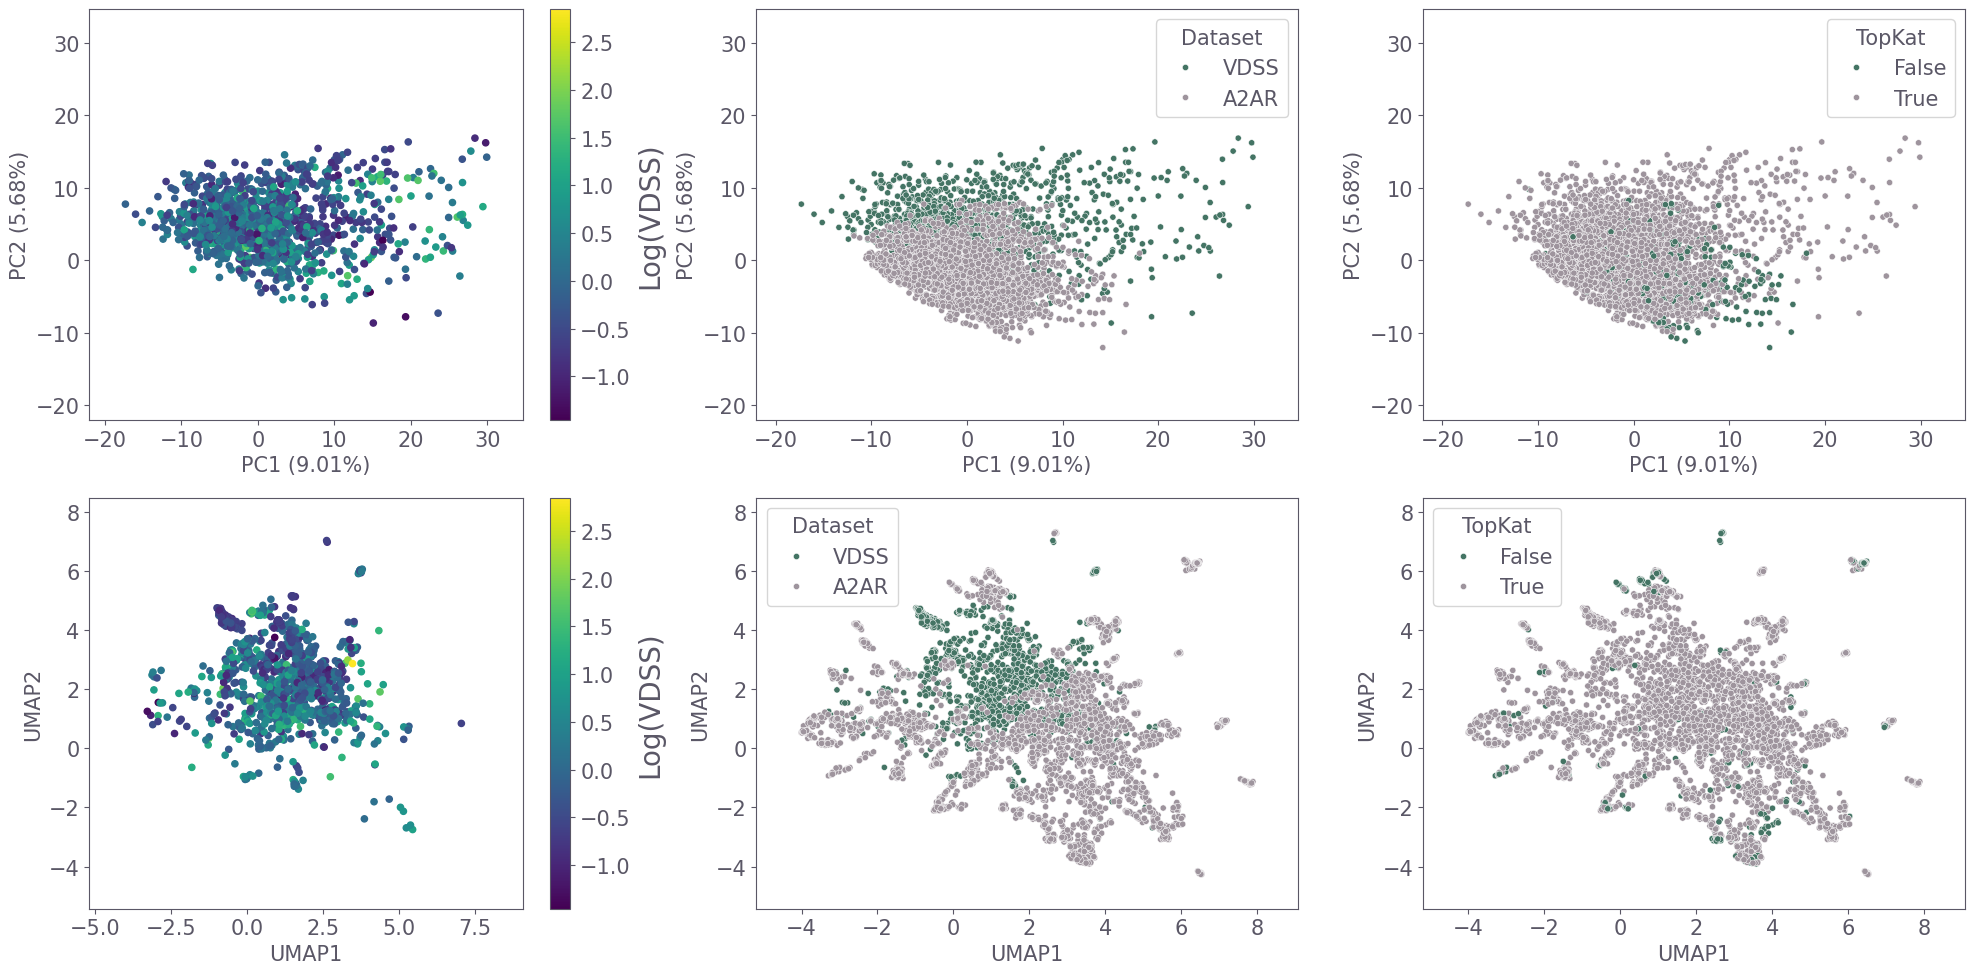

In [30]:
from sklearn.decomposition import PCA
import umap.umap_ as umap_

sns.set_palette(['#447464', '#FFCEAD'])

label_dict = {'pchembl_value_Mean': 'A2AR pKi', 'CL': 'Log(CL)', 'FU': 'Sqrt(FU)', 'VDSS': 'Log(VDSS)'}

ad = 'TopKat'

def plot_applicability(combined_dataset, target_prop, name, umap_settings):
    features = combined_dataset.getFeatures(concat=True, ordered=True, raw=False)
    
    # fit pca and umap
    pca = PCA(n_components=2)
    PC = pca.fit_transform(features)

    umap = umap_.UMAP(n_components=2, **umap_settings)
    UMAP = umap.fit_transform(features)

    max_value_pca = PC.max()
    min_value_pca = PC.min()
    buffer = (max_value_pca - min_value_pca) * 0.1

    # make scatterplot with rows for PCA and UMAP and columns for target property, dataset and applicability domain
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    sns.scatterplot(x=PC[:, 0], y=PC[:, 1], hue=combined_dataset.getDF()[target_prop], ax=ax[0, 0], s=20)
    ax[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    # add colorbar
    cbar = plt.colorbar(ax[0, 0].scatter(PC[:, 0], PC[:, 1], c=combined_dataset.getDF()[target_prop], cmap='viridis', s=20))
    cbar.set_label(label_dict[target_prop], size=20)
    ax[0, 0].legend().remove()

    sns.scatterplot(x=PC[:, 0], y=PC[:, 1], hue=combined_dataset.getDF()['Dataset'], ax=ax[0, 1], palette=[a2arcolors[2], a2arcolors[4]], s=20)
    ax[0, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax[0, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')


    sns.scatterplot(x=PC[:, 0], y=PC[:, 1], hue=combined_dataset.getDF()[ad], ax=ax[0, 2], palette=[a2arcolors[2], a2arcolors[4]], s=20)
    ax[0, 2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax[0, 2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    # set x and y limits
    for i in range(3):
        ax[0, i].set_xlim(min_value_pca-buffer, max_value_pca+buffer)
        ax[0, i].set_ylim(min_value_pca-buffer, max_value_pca+buffer)
        
    sns.scatterplot(x=UMAP[:, 0], y=UMAP[:, 1], hue=combined_dataset.getDF()[target_prop], ax=ax[1, 0], s=20)
    ax[1, 0].set_xlabel(f'UMAP1')
    ax[1, 0].set_ylabel(f'UMAP2')

    # add colorbar
    cbar = plt.colorbar(ax[1, 0].scatter(UMAP[:, 0], UMAP[:, 1], c=combined_dataset.getDF()[target_prop], cmap='viridis', s=20))
    cbar.set_label(label_dict[target_prop], size=20)
    ax[1, 0].legend().remove()

    sns.scatterplot(x=UMAP[:, 0], y=UMAP[:, 1], hue=combined_dataset.getDF()['Dataset'], ax=ax[1, 1], palette=[a2arcolors[2], a2arcolors[4]], s=20)
    ax[1, 1].set_xlabel(f'UMAP1')
    ax[1, 1].set_ylabel(f'UMAP2')

    sns.scatterplot(x=UMAP[:, 0], y=UMAP[:, 1], hue=combined_dataset.getDF()[ad], ax=ax[1, 2], palette=[a2arcolors[2], a2arcolors[4]], s=20)
    ax[1, 2].set_xlabel(f'UMAP1')
    ax[1, 2].set_ylabel(f'UMAP2')

    # set x and y limits
    for i in range(3):
        x_buffer = (UMAP[:, 0].max() - UMAP[:, 0].min()) * 0.1
        y_buffer = (UMAP[:, 1].max() - UMAP[:, 1].min()) * 0.1
        ax[1, i].set_xlim(UMAP[:, 0].min()-x_buffer, UMAP[:, 0].max()+x_buffer)
        ax[1, i].set_ylim(UMAP[:, 1].min()-y_buffer, UMAP[:, 1].max()+y_buffer)

    fig.tight_layout()
    fig.savefig(join(COMPARE_DATA_FIGURES_PATH, f'{name}_PCA_UMAP.png'))
    return pca, features.columns
    
pca_a2ar_cl, features_a2ar_cl = plot_applicability(combined_dataset_A2AR_CL, 'pchembl_value_Mean', name='A2AR_AP_with_CL', umap_settings={'n_neighbors': 150, 'min_dist': 0.6})
pca_a2ar_fu, features_a2ar_fu = plot_applicability(combined_dataset_A2AR_FU, 'pchembl_value_Mean', name='A2AR_AP_with_FU', umap_settings={'n_neighbors': 150, 'min_dist': 0.6})
pca_a2ar_vdss, features_a2ar_vdss = plot_applicability(combined_dataset_A2AR_VDSS, 'pchembl_value_Mean', name='A2AR_AP_with_VDSS', umap_settings={'n_neighbors': 150, 'min_dist': 0.6})
pca_cl, features_cl = plot_applicability(combined_dataset_CL_A2AR, 'CL', name='CL_AP_with_A2AR', umap_settings={'n_neighbors': 50, 'min_dist': 0.2})
pca_fu, features_fu = plot_applicability(combined_dataset_FU_A2AR, 'FU', name='FU_AP_with_A2AR', umap_settings={'n_neighbors': 50, 'min_dist': 0.2})
pca_vdss, features_vdss = plot_applicability(combined_dataset_VDSS_A2AR, 'VDSS', name='VDSS_AP_with_A2AR', umap_settings={'n_neighbors': 50, 'min_dist': 0.2})

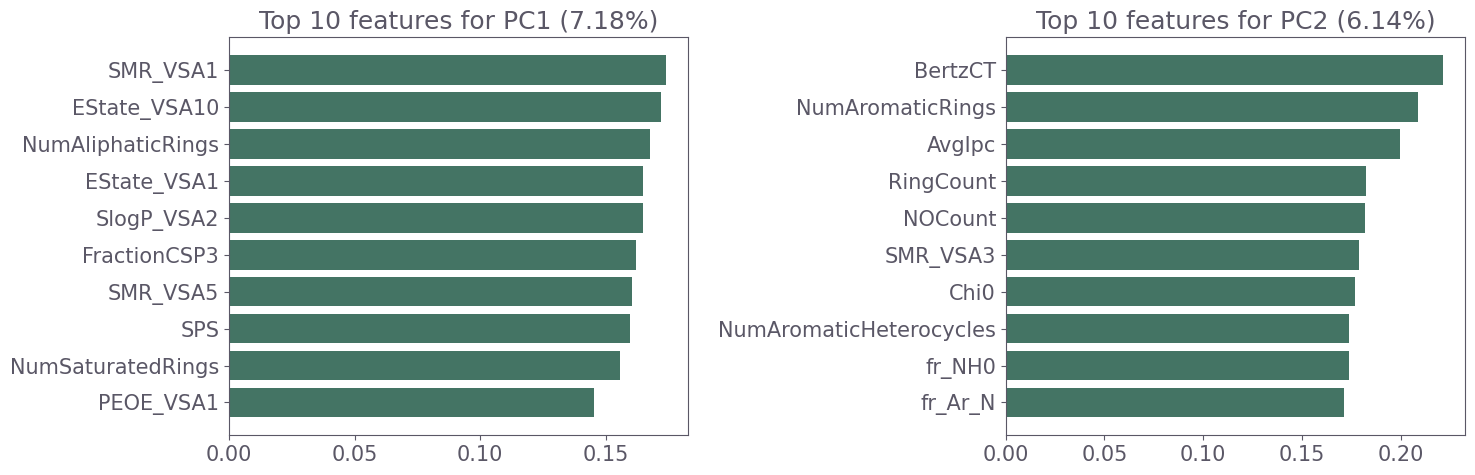

In [31]:
# Make barplot of top 10 features for pc1 and pc2 from PCA
# get the feature importances
importances = pca_fu.components_
# get the feature names
feature_names = features_fu
# get the top 10 features for pc1 and pc2
top10_pc1 = feature_names[np.argsort(importances[0])[-10:]]
top10_pc2 = feature_names[np.argsort(importances[1])[-10:]]

# make a barplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(top10_pc1, importances[0][np.argsort(importances[0])[-10:]])
axes[0].set_title(f'Top 10 features for PC1 ({pca_fu.explained_variance_ratio_[0]*100:.2f}%)')
axes[1].barh(top10_pc2, importances[1][np.argsort(importances[1])[-10:]])
axes[1].set_title(f'Top 10 features for PC2 ({pca_fu.explained_variance_ratio_[1]*100:.2f}%)')
plt.tight_layout()

In [43]:
from scaffviz.clustering.manifold import Manifold
from sklearn.preprocessing import StandardScaler

class UMAP(Manifold):
    def __init__(self, *args, **kwargs):
        import umap.umap_ as umap
        self._umap = umap.UMAP(
            *args, **kwargs
        )
                               
    def fit(self, X):
        self._umap.fit(X)
        return self
        
    def transform(self, X):
        return self._umap.fit_transform(X)
        
    def fit_transform(self, X):
        X = StandardScaler().fit_transform(X)
        return self._umap.fit_transform(X)
    
    def __str__(self):
        return "UMAP"

In [65]:
# append smiles of vdss dataset to test smiles series
test_smiles = pd.concat([DATA_A2AR.getDF()['SMILES'], DATA_VDSS.getDF()['SMILES']])
test_dataset, failed_mask = MODEL_VDSS.createPredictionDatasetFromMols(test_smiles, fill_value=0)

/home/helle/.conda/envs/a2ar/lib/python3.10/site-packages/qsprpred/models/models.py:465: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [66]:
# add property dataset with values DATA_A2AR or DATA_VDSS to test_dataset
test_dataset.addProperty('Dataset', list(pd.concat([pd.Series(['A2AR']*len(DATA_A2AR.getDF())), pd.Series(['VDSS']*len(DATA_VDSS.getDF()))])))

In [64]:
test_dataset.getFeatures(concat=True, ordered=True, raw=False)

MorganFP_126  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
QSPRID                                                                       
SklearnModel_8771180136620_0000     -0.361232        0.412477    -0.464872   
SklearnModel_8771180136620_0001     -0.361232        0.460964    -0.333049   
SklearnModel_8771180136620_0002     -0.361232       -0.640974     1.237580   
SklearnModel_8771180136620_0003     -0.361232        1.196512    -0.525650   
SklearnModel_8771180136620_0004     -0.361232        1.681879    -0.631527   
...                                       ...             ...          ...   
SklearnModel_8771180136620_4552     -0.361232        0.059625    -0.517681   
SklearnModel_8771180136620_4553     -0.361232        0.262842    -0.540131   
SklearnModel_8771180136620_4554      2.768302       -0.479229    -0.524246   
SklearnModel_8771180136620_4555     -0.361232       -0.374883    -0.336634   
SklearnModel_8771180136620_4556     -0.361232       -1.046447    -0.123098   

                                 BCUT2D_MRLOW  BCUT2D_MWHI  EState_VSA5  \
QSPRID                                                                    
SklearnModel_8771180136620_0000     -0.735774    -0.517787    -1.088470   
SklearnModel_8771180136620_0001     -0.067205    -0.529356    -0.277956   
SklearnModel_8771180136620_0002     -0.088480     0.455937     2.526555   
SklearnModel_8771180136620_0003      1.684876    -0.568235    -0.163957   
SklearnModel_8771180136620_0004      1.398024    -0.518359    -1.088470   
...                                       ...          ...          ...   
SklearnModel_8771180136620_4552      0.160643    -0.504513     0.877450   
SklearnModel_8771180136620_4553     -0.771169    -0.529459    -0.591993   
SklearnModel_8771180136620_4554     -1.557385    -0.500254     1.531095   
SklearnModel_8771180136620_4555     -0.081479    -0.529602    -1.088470   
SklearnModel_8771180136620_4556     -0.234340     0.656253     1.007794   

                                 FractionCSP3  MaxAbsEStateIndex  \
QSPRID                                                             
SklearnModel_8771180136620_0000      0.354398           0.327220   
SklearnModel_8771180136620_0001     -1.482578           0.664696   
SklearnModel_8771180136620_0002      0.179448           0.674256   
SklearnModel_8771180136620_0003     -0.547688          -1.976118   
SklearnModel_8771180136620_0004     -1.482578          -1.994273   
...                                       ...                ...   
SklearnModel_8771180136620_4552      0.698831          -0.109873   
SklearnModel_8771180136620_4553     -0.170452           0.333816   
SklearnModel_8771180136620_4554     -1.099033           0.212795   
SklearnModel_8771180136620_4555     -0.602682           0.355318   
SklearnModel_8771180136620_4556      0.277215           0.547311   

                                 MaxAbsPartialCharge  MaxPartialCharge  ...  \
QSPRID                                                                  ...   
SklearnModel_8771180136620_0000             0.305872         -0.641173  ...   
SklearnModel_8771180136620_0001            -1.226153          1.062716  ...   
SklearnModel_8771180136620_0002             0.880667          0.757231  ...   
SklearnModel_8771180136620_0003            -0.833040         -0.316554  ...   
SklearnModel_8771180136620_0004             0.374817         -1.251248  ...   
...                                              ...               ...  ...   
SklearnModel_8771180136620_4552             0.146345          1.744972  ...   
SklearnModel_8771180136620_4553            -1.328950         -0.624356  ...   
SklearnModel_8771180136620_4554             0.632161          0.637440  ...   
SklearnModel_8771180136620_4555            -1.010969         -0.184015  ...   
SklearnModel_8771180136620_4556            -0.283567          1.805309  ...   

                                 PEOE_VSA7  PEOE_VSA8  SMR_VSA10  SMR_VSA7  \
QSPRID                                             

In [67]:
from mlchemad import TopKatApplicabilityDomain
app_domain = TopKatApplicabilityDomain()
app_domain.fit(DATA_VDSS.getFeatures(concat=True, ordered=True, raw=False))
test_dataset.addProperty('VDSS_ad', app_domain.contains(test_dataset.getFeatures(concat=True, ordered=True, raw=False)))
test_dataset.getDF()

SMILES  \
QSPRID                                                                               
SklearnModel_8771180136620_0000  Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n...   
SklearnModel_8771180136620_0001   O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1   
SklearnModel_8771180136620_0002  CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...   
SklearnModel_8771180136620_0003            Cn1c(-n2nccn2)nc2c(N)nc(CCc3ccccc3)nc21   
SklearnModel_8771180136620_0004                Nc1nc(-c2ccccc2)cn2cc(-c3ccco3)nc12   
...                                                                            ...   
SklearnModel_8771180136620_4552              CN(C)CCc1c[nH]c2ccc(CC3COC(=O)N3)cc12   
SklearnModel_8771180136620_4553            Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1   
SklearnModel_8771180136620_4554  O=C(O)Cn1c(=O)c(=O)[nH]c2cc([N+](=O)[O-])c(-n3...   
SklearnModel_8771180136620_4555          N=C(N)NC(=O)c1cnn(-c2cccc3ncccc23)c1C1CC1   
SklearnModel_8771180136620_4556     CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1   

                                                          QSPRID  VDSS  \
QSPRID                                                                   
SklearnModel_8771180136620_0000  SklearnModel_8771180136620_0000   NaN   
SklearnModel_8771180136620_0001  SklearnModel_8771180136620_0001   NaN   
SklearnModel_8771180136620_0002  SklearnModel_8771180136620_0002   NaN   
SklearnModel_8771180136620_0003  SklearnModel_8771180136620_0003   NaN   
SklearnModel_8771180136620_0004  SklearnModel_8771180136620_0004   NaN   
...                                                          ...   ...   
SklearnModel_8771180136620_4552  SklearnModel_8771180136620_4552   NaN   
SklearnModel_8771180136620_4553  SklearnModel_8771180136620_4553   NaN   
SklearnModel_8771180136620_4554  SklearnModel_8771180136620_4554   NaN   
SklearnModel_8771180136620_4555  SklearnModel_8771180136620_4555   NaN   
SklearnModel_8771180136620_4556  SklearnModel_8771180136620_4556   NaN   

                                 VDSS_original  VDSS_before_transform Dataset  \
QSPRID                                                                          
SklearnModel_8771180136620_0000            NaN                    NaN    A2AR   
SklearnModel_8771180136620_0001            NaN                    NaN    A2AR   
SklearnModel_8771180136620_0002            NaN                    NaN    A2AR   
SklearnModel_8771180136620_0003            NaN                    NaN    A2AR   
SklearnModel_8771180136620_0004            NaN                    NaN    A2AR   
...                                        ...                    ...     ...   
SklearnModel_8771180136620_4552            NaN                    NaN    VDSS   
SklearnModel_8771180136620_4553            NaN                    NaN    VDSS   
SklearnModel_8771180136620_4554            NaN                    NaN    VDSS   
SklearnModel_8771180136620_4555            NaN                    NaN    VDSS   
SklearnModel_8771180136620_4556            NaN                    NaN    VDSS   

                                 VDSS_ad  
QSPRID                                    
SklearnModel_8771180136620_0000     True  
SklearnModel_8771180136620_0001     True  
SklearnModel_8771180136620_0002     True  
SklearnModel_8771180136620_0003     True  
SklearnModel_8771180136620_0004     True  
...                                  ...  
SklearnModel_8771180136620_4552     True  
SklearnModel_8771180136620_4553     True  
SklearnModel_8771180136620_4554     True  
SklearnModel_8771180136620_4555     True  
SklearnModel_8771180136620_4556     True  

[4557 rows x 7 columns]

In [70]:
from scaffviz.depiction.plot import Plot
from scaffviz.clustering.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
import umap.umap_ as umap

plot = Plot(UMAP(metric='euclidean', n_neighbors=50))
plot.plot(test_dataset,
          color_by='Dataset',
          card_data=['Dataset', 'VDSS_ad'],
          port=9290)

/home/helle/.conda/envs/a2ar/lib/python3.10/site-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

